# **Netflix & Chill** 
Netflix Recommender App
Tiffany Mangelli MBD Section 1

About this Dataset: Netflix is one of the most popular media and video streaming platforms. This tabular dataset consists of 12 columns which are listed below:-

1. show_id:- Unique ID for every Movie / Tv Show.
2. type:- Identifier - A Movie or TV Show.
3. title:- Title of the Movie / TV Show.
4. director:- Director of the Movie.
5. cast:- Actors involved in the movie/show.
6. country:- Country where the movie/show was produced.
7. date_added:- Date it was added on Netflix.
8. release_year:- Actual Release year of the movie/show.
9. rating:- TV Rating of the movie/show.
10. duration:- Total Duration - in minutes or number of seasons.
11. listed_in:- Genre
12. description:- The summary description.

## PART I: Data Cleaning

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter
from cycler import cycler
import plotly.figure_factory as ff

In [31]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [33]:
for col in list(df.columns):
    
    list_of_unique_values = df[col].unique()
    

    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' unique values ')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' unique values')



show_id: 8807 unique values


type: 2 unique values 
['Movie' 'TV Show']


title: 8807 unique values


director: 4529 unique values


cast: 7693 unique values


country: 749 unique values


date_added: 1768 unique values


release_year: 74 unique values


rating: 18 unique values


duration: 221 unique values


listed_in: 514 unique values


description: 8775 unique values


1. Handling Missing Values

In [34]:
def func_calc_percentual_valores_ausentes_coluna(df):
    mis_val = df.isnull().sum()

    mis_val_percent = 100 * mis_val / len(df)
    mis_val_dtype = df.dtypes
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valores Ausentes', 1 : '% de Valores Ausentes', 2: 'Dtype'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Ausentes', ascending = False).round(2)
    print ("The dataset have " + str(df.shape[1]) + " colunas.\n"
        "Found: " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    if mis_val_table_ren_columns.shape[0] == 0:
        return
    return mis_val_table_ren_columns

In [35]:
df_query=func_calc_percentual_valores_ausentes_coluna(df)
df_query

The dataset have 12 colunas.
Found: 6 columns that have missing values.


,Valores Ausentes,% de Valores Ausentes,Dtype
director,2634,29.91,object
country,831,9.44,object
cast,825,9.37,object
date_added,10,0.11,object
rating,4,0.05,object
duration,3,0.03,object


For columns that have many missing values, as they are categorical variables. I will replace the "NaN" values with "Unknown"

For columns that have few misisng values, I will drop that values, as it will not impcat in our dataset much

In [39]:
for col in df_query.index[:3]:
    df[col]=df[col].fillna('Unknown')
    
df=df.dropna()
func_calc_percentual_valores_ausentes_coluna(df)

The dataset have 12 colunas.
Found: 0 columns that have missing values.


2. Creation of new columns for data

In [40]:
month=[]
day=[]
year=[]
for i in df['date_added'].values:
    try:
        formato='%B %d, %Y'
        i=dt.strptime(i,formato)
    except: 
        formato=' %B %d, %Y'
        i=dt.strptime(i,formato)
    month.append(i.month)
    day.append(i.day)
    year.append(i.year)

df['realease_Month']=month
df['realease_Day']=day
df['realease_year']=year
# Exclude date_added
df=df.drop('date_added',axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   show_id         8790 non-null   object
 1   type            8790 non-null   object
 2   title           8790 non-null   object
 3   director        8790 non-null   object
 4   cast            8790 non-null   object
 5   country         8790 non-null   object
 6   release_year    8790 non-null   int64 
 7   rating          8790 non-null   object
 8   duration        8790 non-null   object
 9   listed_in       8790 non-null   object
 10  description     8790 non-null   object
 11  realease_Month  8790 non-null   int64 
 12  realease_Day    8790 non-null   int64 
 13  realease_year   8790 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 1.0+ MB


## PART 2: Exploratory Data Analysis

Netflix Movies and TV shows Releases Per Year

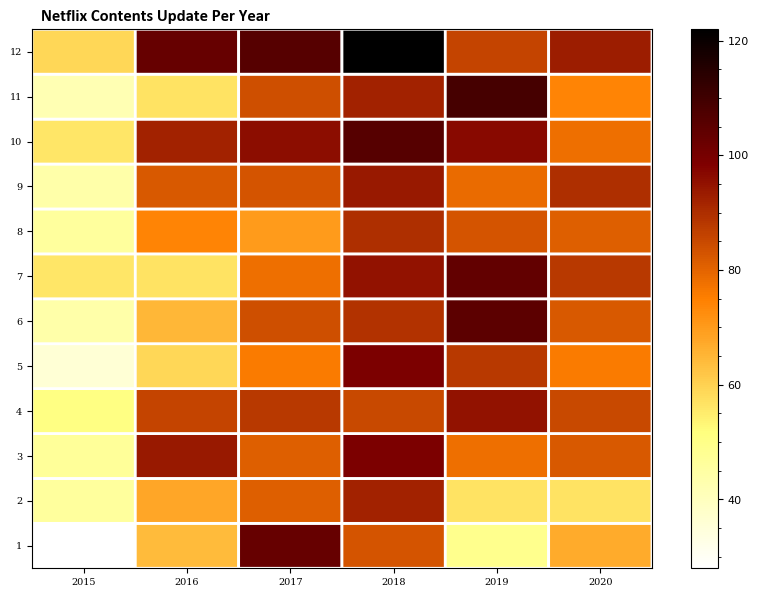

In [43]:
df_query = df.groupby('realease_Month')['release_year'].value_counts().unstack().fillna(0).T[-7:-1].T

plt.figure(figsize=(10, 7))
plt.pcolor(df_query, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_query.columns), 1), df_query.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_query.index), 1), df_query.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update Per Year', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

Distribution of Movies versus TV Shows

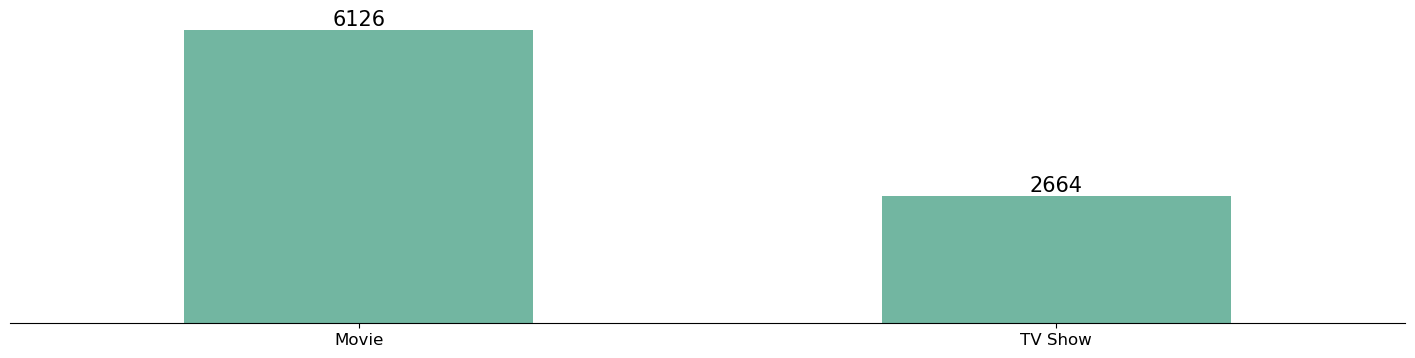

In [46]:
plt.figure(figsize=(18,4))


cores=plt.get_cmap("Set2").colors
ciclo_cores=cycler('color',cores)
plt.rc('axes',prop_cycle=ciclo_cores)

b=sns.countplot(x=df['type'],data=df,width=0.5,color=cores[0])
plt.ylabel('')
plt.xlabel('')
plt.tick_params('x',labelsize=12)
plt.yticks([])
sns.despine(top=True, right=True,left=True)

for b in b.containers:
    plt.bar_label(b,fontsize=15)

plt.show()

Content by Genre

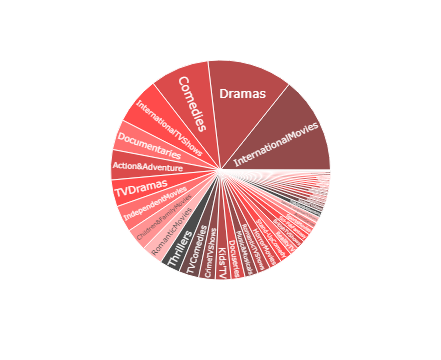

In [45]:
genres=list(df['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
# Size   
g=Counter(gen)

genres=list(df['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))


dic_order = dict(sorted(g.items(), key=lambda item: item[1]))
dic_order

data1 = {
    'Category': list(dic_order.keys()),
    'Values': list(dic_order.values())
}

df_query = pd.DataFrame(data1)

custom_palette = ['#660000', '#990000', '#CC0000', '#FF0000', '#FF3333']

fig = px.sunburst(df_query, path=['Category'], values='Values', color_discrete_sequence=custom_palette)

fig.show()

In [47]:
df_filtered=df[df['director'].isin(list(df['director'].value_counts()[1:16].index))]

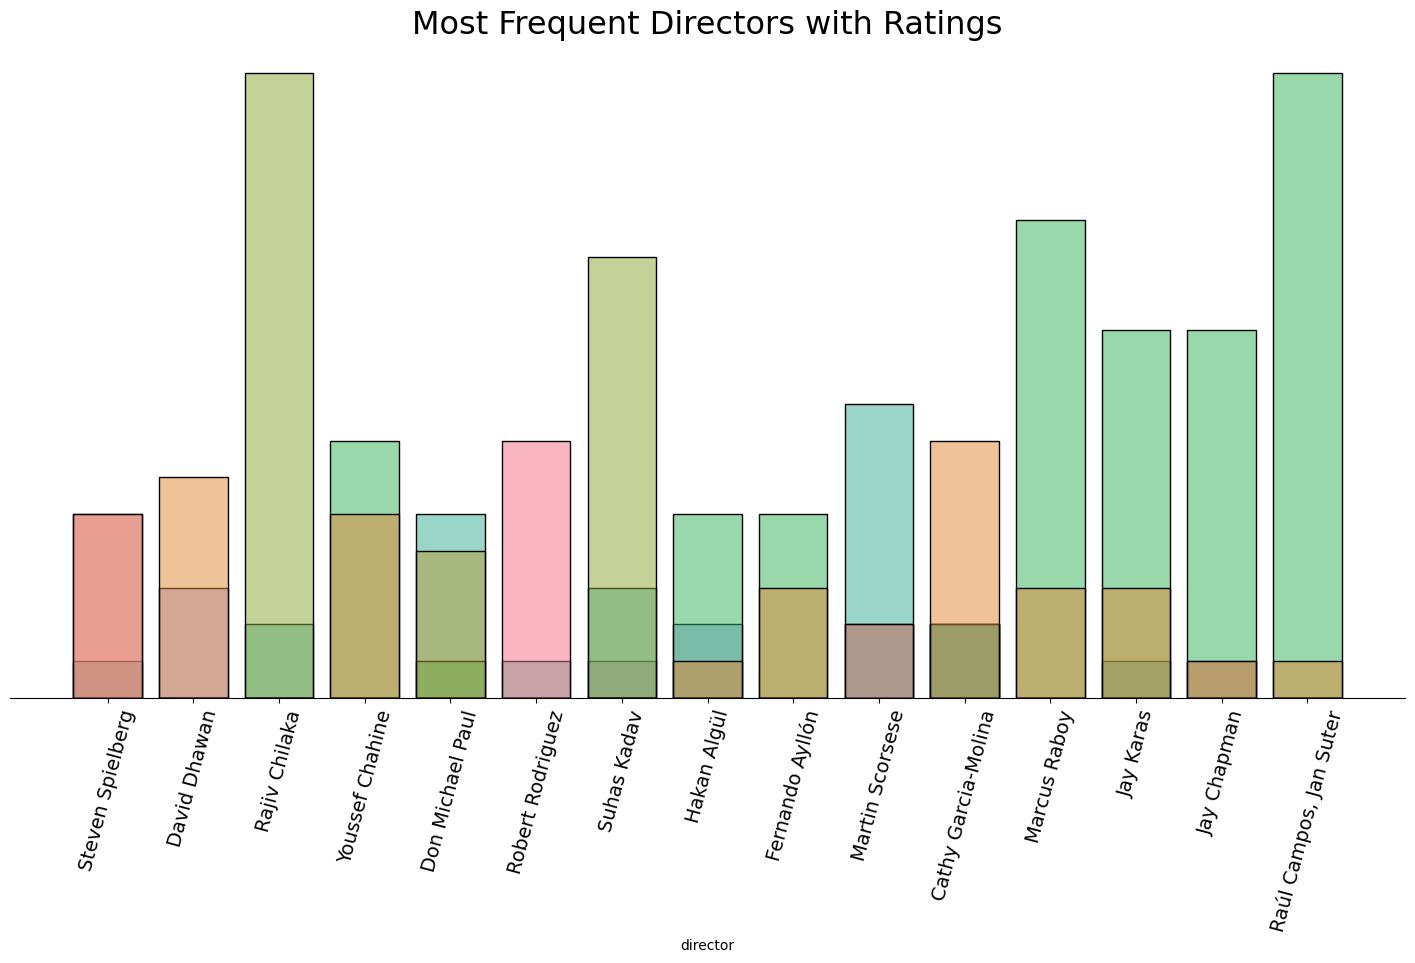

In [50]:
fig=plt.figure(figsize=(18,8))

h=sns.histplot(x=df_filtered['director'],hue='rating',
                 shrink=0.8,
                data=df_filtered)
sns.despine(top=True, right=True,left=True)
plt.yticks([])
plt.ylabel('')
plt.tick_params(labelsize=14,labelrotation=75)
legenda=h.get_legend()
legenda.remove()
rotulos=[text.get_text() for text in legenda.get_texts()] 

plt.subplots_adjust(wspace=0.9,hspace=0.9,top=0.93)
plt.title("Most Frequent Directors with Ratings",fontsize=23)
plt.show()

Content by Rating

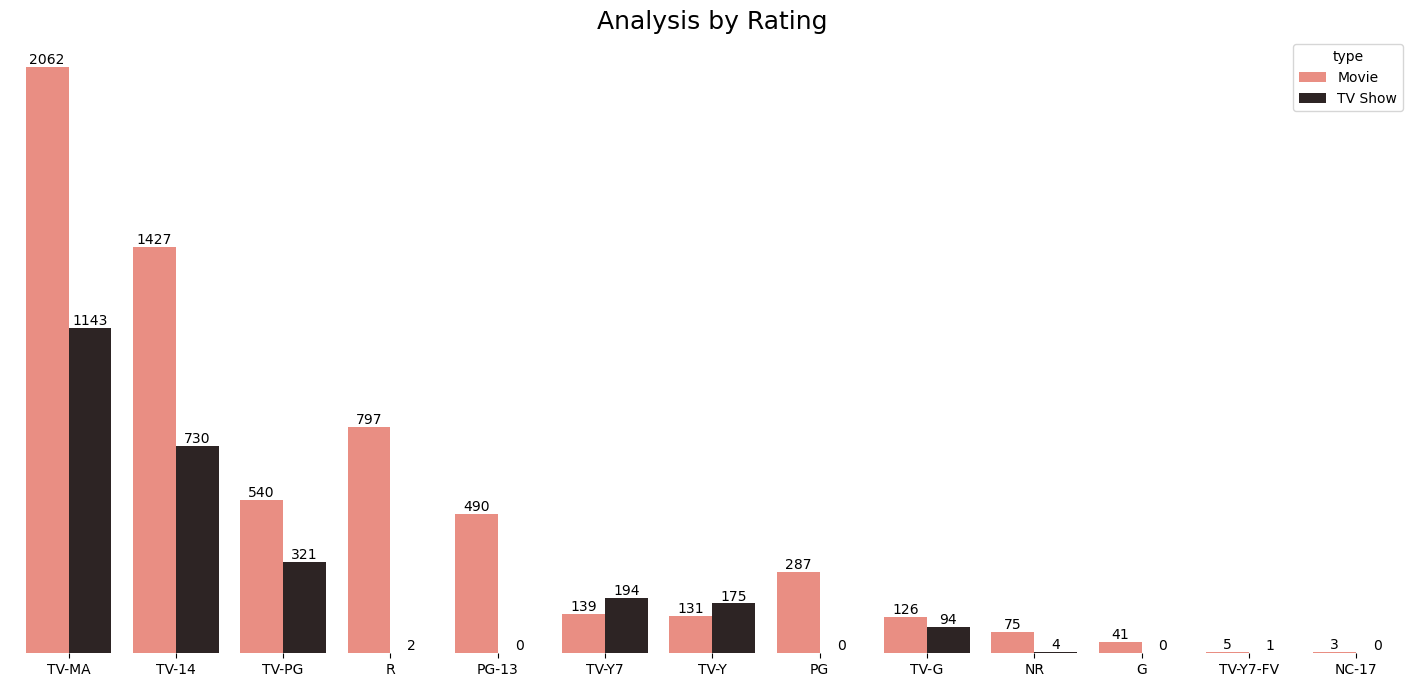

In [51]:
plt.figure(figsize=(18,8))
c=sns.countplot(x=df['rating'],data=df,order=df['rating'].value_counts().index[0:-1],
              palette="dark:salmon_r",hue='type')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.title("Analysis by Rating",fontsize=18)
for c in c.containers:
    plt.bar_label(c)

for spine in plt.gca().spines.values():
    spine.set_color('none')
    
plt.show()

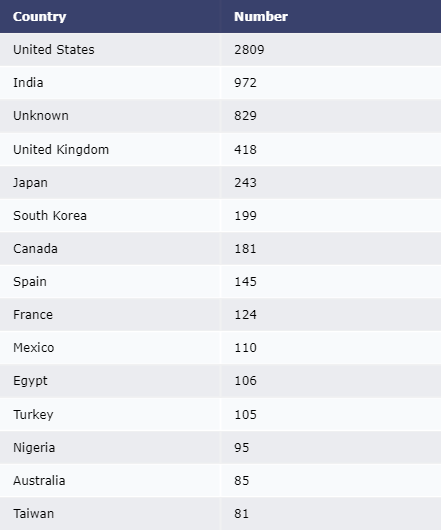

In [52]:
data=[]
for country,qtd in enumerate(df['country'].value_counts()[0:15]):
        d=dict(Country=df['country'].value_counts()[0:15].index[country],Number=qtd)
        data.append(d)

dfe = pd.DataFrame(data)
fig = ff.create_table(dfe)
fig.show()